In [9]:
#Import libraries
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [10]:
#Import datasheet with pandas
#rdata = rawdata
rdata = pd.read_csv('data1.csv')

#Display data - raw and unfiltered
rdata

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration_ms,explicit,id,release_date
0,Me Tengo Que Ir,"[""Adolescent's Orquesta""]",1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846,280189,0,3AK05RIuu30jqJ40cfOxLD,1/10/1996
1,Persona Ideal,"[""Adolescent's Orquesta""]",1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840,283273,0,0u2LbmKA70atp4J59QUnHW,1997
2,Aquel Lugar,"[""Adolescent's Orquesta""]",2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652,233326,0,2vHNqDJe1qvt1sroQfNHSI,2008
3,Virgen,"[""Adolescent's Orquesta""]",2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807,273738,0,4ae223xfO5QUzbDWqLJMag,5/1/2008
4,Arrepentida,"[""Adolescent's Orquesta""]",1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895,251351,0,0f6VT4JZxNc9DE2kUtqlNw,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,I Got the Message,['ZZ Top'],1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785,207973,0,2aiEUliMu3v4xxbF48Z6WG,10/28/1985
170649,"Heaven, Hell or Houston",['ZZ Top'],1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518,152427,0,198lkJSVuxsObZYw0dDTK4,7/20/1981
170650,It's so Hard,['ZZ Top'],1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826,311800,0,0KHlEPAx4YUEeO16kwRpBs,7/20/1981
170651,La Grange,['ZZ Top'],2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520,234107,0,060SIy6PC30dMWw6wI6292,7/19/2005


In [11]:
#Drops unneccesary columns to save space 
#data = droppeddata
ddata = rdata.drop(columns=['duration_ms','explicit','id','release_date'])

#Rids of ('' [] "") in artist column
#da is originally a 'Series', use .to_frame() to make into DataFrame
da = ddata.artists.str.strip('["]\'').to_frame()
#da = dataframeartist
da

,artists
0,Adolescent's Orquesta
1,Adolescent's Orquesta
2,Adolescent's Orquesta
3,Adolescent's Orquesta
4,Adolescent's Orquesta
...,...
170648,ZZ Top
170649,ZZ Top
170650,ZZ Top
170651,ZZ Top


In [12]:
#must put cleaned artists column into a new DataFrame
df = ddata.assign(artists=da['artists'])
#df = dataframe - will be using from now on
df

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Me Tengo Que Ir,Adolescent's Orquesta,1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846
1,Persona Ideal,Adolescent's Orquesta,1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840
2,Aquel Lugar,Adolescent's Orquesta,2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652
3,Virgen,Adolescent's Orquesta,2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807
4,Arrepentida,Adolescent's Orquesta,1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,I Got the Message,ZZ Top,1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785
170649,"Heaven, Hell or Houston",ZZ Top,1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518
170650,It's so Hard,ZZ Top,1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826
170651,La Grange,ZZ Top,2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520


In [13]:
#Display data type for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              170653 non-null  object 
 1   artists           170653 non-null  object 
 2   year              170653 non-null  int64  
 3   acousticness      170653 non-null  float64
 4   danceability      170653 non-null  float64
 5   energy            170653 non-null  float64
 6   instrumentalness  170653 non-null  float64
 7   key               170653 non-null  int64  
 8   liveness          170653 non-null  float64
 9   loudness          170653 non-null  float64
 10  mode              170653 non-null  int64  
 11  popularity        170653 non-null  int64  
 12  speechiness       170653 non-null  float64
 13  tempo             170653 non-null  float64
 14  valence           170653 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 19.5+ MB


In [14]:
#Display some statistics of the data
#There are no null entries (count is same in all columns)
df.describe()

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,1976.787241,0.502115,0.537396,0.482389,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590,0.528587
std,25.917853,0.376032,0.176138,0.267646,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533,0.263171
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.102000,0.415000,0.255000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000,0.317000
50%,1977.000000,0.516000,0.548000,0.471000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000,0.540000
75%,1999.000000,0.893000,0.668000,0.703000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000,0.747000
max,2020.000000,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000,1.000000


In [15]:
#dfw = dataframe w/o name and artists
dfw=df.drop(columns = ['name','artists'])

In [16]:
#Randomly selects a song in the training sample and retrieves its features
#rsong = random song, fsong = featuresong
rsong = df.sample(7)
fsong = rsong[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]
fsong

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
155278,0.00507,0.670,0.571,0.000072,-9.976,0.0255,109.905,0.899
168671,0.13800,0.578,0.360,0.000007,-12.900,0.0239,90.593,0.392
29596,0.98800,0.311,0.115,0.000884,-12.492,0.0398,80.596,0.498
134399,0.00771,0.478,0.937,0.018100,-6.173,0.1060,131.418,0.294
30084,0.01260,0.362,0.979,0.000005,-4.192,0.2150,171.220,0.254
12464,0.33300,0.432,0.512,0.000001,-5.578,0.1180,198.150,0.914
73323,0.95900,0.849,0.216,0.182000,-19.905,0.0401,114.226,0.923


In [17]:
features = dfw[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]

In [94]:
#Gets specific song by searching for name of song and artists.
#Some searches have duplicate records because of re-recordings in different years
#Such as name = Virgen, artists = Adolescent'ts Qrquesta
song= df.loc[(df['name'] == "Do I Wanna Know?") & (df['artists'] == 'Arctic Monkeys')]
songf = song[['artists','name','acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]
songf

,artists,name,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
9626,Arctic Monkeys,Do I Wanna Know?,0.186,0.548,0.532,0.000263,-7.596,0.0323,85.03,0.405


In [19]:
#Using the elbow method to find the optimal clustering amount
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfw)
    distortions.append(kmeanModel.inertia_)

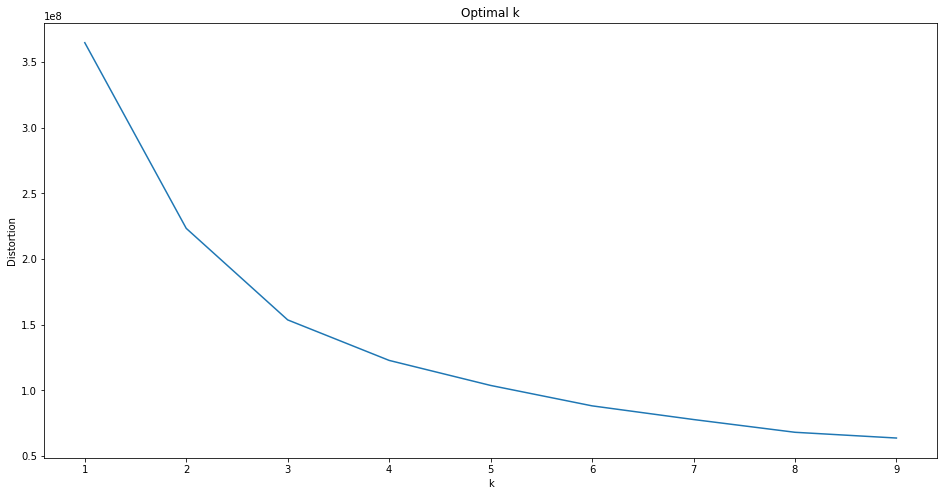

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()
#4

In [21]:
km = KMeans(n_clusters = 4)
km.fit(dfw)
cluster = km.labels_

In [22]:
newdf=dfw.assign(Cluster=cluster)
grouped=newdf.groupby(["Cluster"])
grouped.agg({'acousticness' : 'mean','danceability' : 'mean','energy' : 'mean','instrumentalness' : 'mean','loudness' : 'mean',
             'speechiness' : 'mean','tempo' : 'mean','valence' : 'mean',})

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
Cluster,,,,,,,,
0,0.337650,0.586633,0.571164,0.107256,-9.901664,0.075940,100.658037,0.532299
1,0.262618,0.530719,0.642596,0.088820,-8.579855,0.084141,151.985076,0.539294
2,0.701585,0.527099,0.382050,0.227660,-13.250802,0.116207,137.867717,0.586287
3,0.818250,0.476637,0.274719,0.283567,-15.181839,0.131629,88.792326,0.461387


In [134]:
newdf

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
0,1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846,0
1,1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840,0
2,2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652,0
3,2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807,0
4,1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785,0
170649,1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518,0
170650,1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826,0
170651,2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520,1


In [23]:
newdf_melt=pd.melt(newdf.reset_index(), id_vars =['Cluster'],value_vars=['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence'],var_name='Metric',value_name='Value')

In [24]:
#sorts clustered DataFrame by year
result = newdf.sort_values(by='year')
result

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
70534,1921,0.9960,0.655,0.1190,0.474000,11,0.1430,-22.774,1,0,0.1270,106.511,0.558,3
61289,1921,0.9950,0.561,0.3670,0.000000,9,0.3400,-15.549,1,0,0.3540,75.554,0.759,3
103000,1921,0.9850,0.314,0.2810,0.000064,0,0.1340,-13.337,0,0,0.0648,78.811,0.354,3
135322,1921,0.9940,0.263,0.0536,0.927000,8,0.0980,-28.147,1,1,0.0386,129.365,0.186,2
135323,1921,0.9940,0.248,0.0876,0.907000,5,0.1650,-25.786,1,0,0.0566,82.025,0.077,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94693,2020,0.0582,0.719,0.6110,0.000000,7,0.1550,-5.010,0,73,0.0403,129.962,0.489,1
11888,2020,0.1980,0.770,0.6360,0.000003,10,0.1150,-7.636,0,73,0.0901,93.032,0.414,0
73164,2020,0.2280,0.749,0.8150,0.001170,5,0.0838,-6.381,0,0,0.0830,102.218,0.866,0
73162,2020,0.1570,0.718,0.7110,0.000055,8,0.1000,-5.746,0,0,0.1100,173.916,0.920,1


In [156]:
c0 = newdf[newdf['Cluster']==0].reindex()
c1 = newdf[newdf['Cluster']==1].reindex()
c2 = newdf[newdf['Cluster']==2].reindex()
c3 = newdf[newdf['Cluster']==3].reindex()

In [158]:
c0

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
0,1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846,0
1,1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840,0
2,2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652,0
3,2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807,0
4,1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170645,1992,0.2540,0.632,0.549,0.00535,5,0.2080,-11.264,0,34,0.0436,93.966,0.792,0
170648,1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785,0
170649,1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518,0
170650,1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826,0


In [27]:
#add artists and song name back into clusters (at end of DataFrame)
#c#a = cluster1 w/ artist
#c#f = cluster1 full data
c0a = c0.assign(artists=da['artists'])
c0f = c0a.assign(name=df['name'])

c1a = c1.assign(artists=da['artists'])
c1f = c1a.assign(name=df['name'])

c2a = c2.assign(artists=da['artists'])
c2f = c2a.assign(name=df['name'])

c3a = c3.assign(artists=da['artists'])
c3f = c3a.assign(name=df['name'])

In [166]:
#puts artists and name at beginning of DataFrame
neworder = ['name','artists','year','acousticness','danceability','energy','instrumentalness','key','liveness',
            'loudness','mode','popularity','speechiness','tempo','valence','Cluster']
c0f = c0f.reindex(columns = neworder)
c1f = c1f.reindex(columns = neworder)
c2f = c2f.reindex(columns = neworder)
c3f = c3f.reindex(columns = neworder)

In [167]:
#look at rebuilt DataFrame
c0f.sort_values('year').tail()

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
83563,I Need You Christmas,Jonas Brothers,2020,0.6370,0.359,0.497,0.000000,0,0.105,-6.244,1,69,0.0288,99.186,0.169,0
73294,Hood Scars 2 (with Lil Tjay),"J.I the Prince of N.Y', 'Lil Tjay",2020,0.3140,0.730,0.581,0.000000,1,0.141,-8.032,0,68,0.4400,123.441,0.156,0
73300,Letter 2 U,J.I the Prince of N.Y,2020,0.6660,0.583,0.465,0.000002,1,0.107,-11.196,1,67,0.2720,90.812,0.222,0
83754,Almost Maybes,Jordan Davis,2020,0.1460,0.582,0.868,0.000000,11,0.103,-3.927,1,74,0.0522,90.105,0.555,0
48984,廻廻奇譚,Eve,2020,0.0128,0.565,0.919,0.000000,5,0.292,-3.378,0,76,0.0898,92.325,0.565,0


In [223]:
#searches song by index in specific cluster by index and assigns index to variable
#songbi = song by index with row
#sname = song index
songbi = c0f.loc[17007]
sname = song.name
sname

17007

In [224]:
#searches index variable in original DataFrame
#ss = searched song
ssong = df.iloc[sname]
ssong

name                New York State of Mind
artists                         Billy Joel
year                                  1985
acousticness                         0.464
danceability                         0.501
energy                               0.377
instrumentalness                   3.4e-05
key                                      0
liveness                             0.112
loudness                            -9.497
mode                                     1
popularity                              32
speechiness                         0.0352
tempo                              121.928
valence                              0.206
Name: 17007, dtype: object

In [233]:
#searches for 10 songs in same cluster within 5 years of song searched
c0f[(ssong.year >= (c0f['year'] - 5)) & (ssong.year <= c0f['year'] + 5)].sample(10)

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
35714,Pour Some Sugar On Me - Remastered 2017,Def Leppard,1987,0.002110,0.267,0.953,0.000000,1,0.2830,-4.899,0,74,0.0960,84.989,0.568,0
108172,Vattene amore (feat. Amedeo Minghi),"Mietta', 'Amedeo Minghi",1990,0.425000,0.562,0.639,0.000000,8,0.0858,-8.356,1,52,0.0298,113.989,0.469,0
17012,The Longest Time,Billy Joel,1985,0.248000,0.650,0.306,0.000000,3,0.1460,-10.491,1,31,0.0266,84.264,0.665,0
119117,You Better Run,Pat Benatar,1980,0.102000,0.605,0.621,0.000744,9,0.2200,-10.495,1,37,0.0532,125.701,0.696,0
47874,Forever Man - 1999 Remaster,Eric Clapton,1985,0.207000,0.649,0.898,0.010300,2,0.1930,-6.018,0,41,0.0428,111.151,0.797,0
6888,Big in Japan,Alphaville,1984,0.069000,0.748,0.414,0.067100,2,0.3360,-15.150,0,66,0.0405,97.646,0.239,0
148035,Drive - 2017 Remaster,The Cars,1984,0.115000,0.261,0.703,0.000780,6,0.1020,-7.871,1,69,0.0414,83.495,0.405,0
147759,Home In The Islands,The Brothers Cazimero,1987,0.546000,0.454,0.196,0.000003,7,0.0907,-17.492,1,32,0.0362,126.422,0.435,0
89373,"Yeah, Yeah, Yeah",Kix,1981,0.000233,0.511,0.614,0.695000,10,0.2050,-14.436,0,25,0.0472,95.221,0.654,0
81714,Jack & Diane,John Mellencamp,1982,0.036500,0.811,0.410,0.000007,9,0.0799,-8.214,1,74,0.0391,103.965,0.626,0


In [239]:
#Gets index of specific song by name
#Searches song in DataFrame before clustering
#songn = song name
songn = ssong['name']
year = ssong['year']
idx = df[df['name'] == 'Shake It Off'].index# & (df['year'] == year))].index
df.loc[idx]

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
88638,Shake It Off,Kidz Bop Kids,2015,0.0471,0.681,0.874,0.0,7,0.102,-4.618,1,53,0.183,160.125,0.927
103317,Shake It Off,Mariah Carey,2005,0.1810,0.777,0.493,0.0,2,0.108,-6.516,1,61,0.126,134.086,0.820
144848,Shake It Off,Taylor Swift,2014,0.0561,0.648,0.785,0.0,7,0.148,-5.414,1,70,0.165,160.020,0.943
144942,Shake It Off,Taylor Swift,2014,0.0647,0.647,0.800,0.0,7,0.334,-5.384,1,62,0.165,160.078,0.942
144944,Shake It Off,Taylor Swift,2014,0.0647,0.647,0.800,0.0,7,0.334,-5.384,1,56,0.165,160.078,0.942


In [267]:
#combines all clustered DataFrames into one DataFrame
fourframes = [c0f,c1f,c2f,c3f]
allsongs = pd.concat(fourframes)
allsongs

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
0,Me Tengo Que Ir,Adolescent's Orquesta,1996,0.25800,0.451,0.785,0.000000,2,0.120,-4.701,0,62,0.0362,96.831,0.846,0
1,Persona Ideal,Adolescent's Orquesta,1997,0.43700,0.464,0.511,0.000000,2,0.149,-11.815,0,62,0.0329,96.856,0.840,0
2,Aquel Lugar,Adolescent's Orquesta,2008,0.36000,0.747,0.619,0.000000,7,0.132,-4.706,1,67,0.0360,92.124,0.652,0
3,Virgen,Adolescent's Orquesta,2008,0.65300,0.640,0.796,0.000210,10,0.115,-4.571,0,66,0.0437,91.306,0.807,0
4,Arrepentida,Adolescent's Orquesta,1997,0.45400,0.737,0.614,0.000000,8,0.285,-11.871,1,54,0.0542,110.929,0.895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170517,Everything I Love,Zoot Sims,1956,0.87700,0.611,0.409,0.044300,8,0.241,-7.567,1,10,0.0358,96.120,0.679,3
170518,On The Alamo,Zoot Sims,1956,0.82100,0.559,0.421,0.000836,0,0.202,-6.218,0,9,0.0413,99.095,0.826,3
170542,Aaye mausum rangeelay suhanay jiya nahin manay,Zubaida Khanum,1949,0.54600,0.392,0.530,0.000000,5,0.380,-11.463,0,0,0.0552,101.718,0.798,3
170543,Behki Behki Hawa Jaari Ja Jaari Ja 1,Zubaida Khanum,1949,0.98200,0.628,0.452,0.017400,2,0.377,-10.418,1,0,0.0434,102.445,0.717,3


In [268]:
#checks to see if DataFrames matches
allsongs.loc[17007]

name                New York State of Mind
artists                         Billy Joel
year                                  1985
acousticness                         0.464
danceability                         0.501
energy                               0.377
instrumentalness                   3.4e-05
key                                      0
liveness                             0.112
loudness                            -9.497
mode                                     1
popularity                              32
speechiness                         0.0352
tempo                              121.928
valence                              0.206
Cluster                                  0
Name: 17007, dtype: object

In [272]:
#add cluster column to rdata DataFrame
fullrdata = rdata.assign(cluster=allsongs['Cluster'])
fullrdata

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration_ms,explicit,id,release_date,cluster
0,Me Tengo Que Ir,"[""Adolescent's Orquesta""]",1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846,280189,0,3AK05RIuu30jqJ40cfOxLD,1/10/1996,0
1,Persona Ideal,"[""Adolescent's Orquesta""]",1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840,283273,0,0u2LbmKA70atp4J59QUnHW,1997,0
2,Aquel Lugar,"[""Adolescent's Orquesta""]",2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652,233326,0,2vHNqDJe1qvt1sroQfNHSI,2008,0
3,Virgen,"[""Adolescent's Orquesta""]",2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807,273738,0,4ae223xfO5QUzbDWqLJMag,5/1/2008,0
4,Arrepentida,"[""Adolescent's Orquesta""]",1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895,251351,0,0f6VT4JZxNc9DE2kUtqlNw,1997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,I Got the Message,['ZZ Top'],1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785,207973,0,2aiEUliMu3v4xxbF48Z6WG,10/28/1985,0
170649,"Heaven, Hell or Houston",['ZZ Top'],1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518,152427,0,198lkJSVuxsObZYw0dDTK4,7/20/1981,0
170650,It's so Hard,['ZZ Top'],1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826,311800,0,0KHlEPAx4YUEeO16kwRpBs,7/20/1981,0
170651,La Grange,['ZZ Top'],2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520,234107,0,060SIy6PC30dMWw6wI6292,7/19/2005,1
